# <u> Yerevan Hotels Reservation Prices Analysis

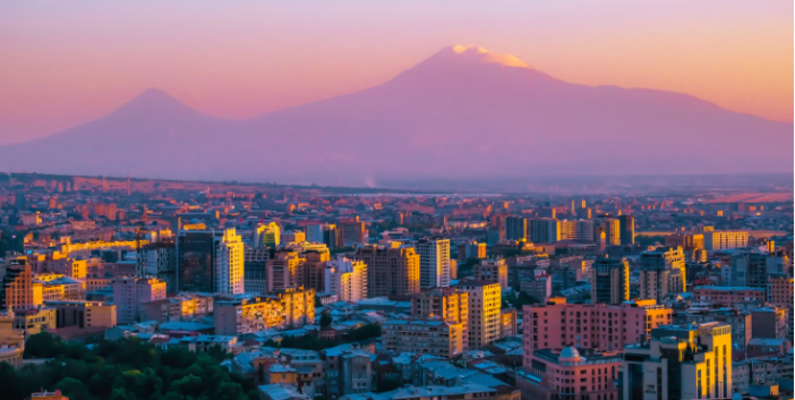

## Author: <i><u>Supriya Nagpal

#### Dataset Link: https://www.kaggle.com/datasets/gorororororo23/yerevan-hotels-reservation-prices/data

### Problem Statement

#### Objective: 

The primary goal is to analyze the hotel reservation prices in Yerevan, Armenia, and determine the key factors influencing these prices. The analysis will help understand how different hotel attributes and customer ratings affect the pricing structure. This understanding can guide hotels in optimizing their pricing strategies and help travelers make informed decisions based on their preferences and budget.

#### Dataset Description:

The dataset consists of 120 entries, each representing a hotel in Yerevan. The dataset contains 13 columns, including various hotel attributes and customer ratings. The columns are as follows:

1. Hotel Names: The name of the hotel.
2. Star Rating: The star rating of the hotel (e.g., 3-star, 5-star).
3. Rating: Overall customer rating of the hotel.
4. Free Parking: Indicates whether the hotel offers free parking (Yes/No).
5. Fitness Centre: Indicates whether the hotel has a fitness center (Yes/No).
6. Spa and Wellness Centre: Indicates whether the hotel has a spa and wellness center (Yes/No).
7. Airport Shuttle: Indicates whether the hotel provides an airport shuttle service (Yes/No).
8. Staff: Customer rating of the hotel's staff.
9. Facilities: Customer rating of the hotel's facilities.
10. Location: Customer rating of the hotel's location.
11. Comfort: Customer rating of the hotel's comfort.
12. Cleanliness: Customer rating of the hotel's cleanliness.
13. Price Per Day($): The price per day in USD for staying at the hotel.

#### Key Questions to Answer:

1. What is the distribution of hotel prices in Yerevan?
2. How do customer ratings correlate with hotel prices?
3. Which amenities (free parking, fitness center, spa, and airport shuttle) influence hotel prices the most?
4. How does the star rating of hotels affect their pricing?
5. What are the most significant factors affecting hotel prices?

### 1. Import Required Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 2. Reading Data

In [2]:
# Location of Data

path = r'Yerevan-Hotels.csv'
YH_Data = pd.read_csv(path)

In [3]:
YH_Data.info() # information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hotel Names              120 non-null    object 
 1   Star Rating              120 non-null    object 
 2   Rating                   120 non-null    object 
 3   Free Parking             120 non-null    object 
 4   Fitness Centre           120 non-null    object 
 5   Spa and Wellness Centre  120 non-null    object 
 6   Airport Shuttle          120 non-null    object 
 7   Staff                    120 non-null    object 
 8   Facilities               120 non-null    object 
 9   Location                 120 non-null    object 
 10  Comfort                  120 non-null    object 
 11  Cleanliness              120 non-null    object 
 12  Price Per Day($)         120 non-null    float64
dtypes: float64(1), object(12)
memory usage: 12.3+ KB


In [4]:
YH_Data.head() # Shows only first five rows of the data

,Hotel Names,Star Rating,Rating,Free Parking,Fitness Centre,Spa and Wellness Centre,Airport Shuttle,Staff,Facilities,Location,Comfort,Cleanliness,Price Per Day($)
0,Kenut Hostel,None,9.7,Yes,No,No,No,9.9,9.8,8.8,9.7,9.8,30.0
1,Kantar Hostel,None,9.3,Yes,No,No,Yes,9.7,9.4,9.7,9.2,9.2,15.0
2,Sweet Sleep hostel,None,9.5,Yes,No,No,No,9.8,9.5,8.9,9.4,9.5,20.0
3,Royal Boutique Hotel on Kievyan,None,7.4,Yes,No,No,Yes,8.1,7.3,8.3,7.5,7.8,26.0
4,Areg Hotel,3,8.2,No,No,No,No,9.1,8.0,8.3,8.1,8.2,29.0


In [5]:
YH_Data.tail() # Shows only last five rows of the data

,Hotel Names,Star Rating,Rating,Free Parking,Fitness Centre,Spa and Wellness Centre,Airport Shuttle,Staff,Facilities,Location,Comfort,Cleanliness,Price Per Day($)
115,Radisson BLU Hotel Yerevan,5,8.5,Yes,Yes,Yes,Yes,8.8,8.7,8.4,8.8,8.8,118.0
116,Bourbon Boutique Hotel,3,9.1,No,No,No,Yes,9.4,9.2,9.6,9.4,9.4,102.0
117,Messier 53 Hotel Yerevan,4,8.9,Yes,Yes,Yes,Yes,9.2,9.0,9.1,9.1,9.1,118.0
118,Vertoni Hotel Yerevan,None,9.5,No,No,No,Yes,9.7,9.5,8.3,9.7,9.7,50.0
119,14 Floor Hotel,None,8.6,Yes,No,No,Yes,9.3,8.4,9.6,8.8,8.7,85.0


In [6]:
YH_Data # Shows full data

,Hotel Names,Star Rating,Rating,Free Parking,Fitness Centre,Spa and Wellness Centre,Airport Shuttle,Staff,Facilities,Location,Comfort,Cleanliness,Price Per Day($)
0,Kenut Hostel,None,9.7,Yes,No,No,No,9.9,9.8,8.8,9.7,9.8,30.0
1,Kantar Hostel,None,9.3,Yes,No,No,Yes,9.7,9.4,9.7,9.2,9.2,15.0
2,Sweet Sleep hostel,None,9.5,Yes,No,No,No,9.8,9.5,8.9,9.4,9.5,20.0
3,Royal Boutique Hotel on Kievyan,None,7.4,Yes,No,No,Yes,8.1,7.3,8.3,7.5,7.8,26.0
4,Areg Hotel,3,8.2,No,No,No,No,9.1,8.0,8.3,8.1,8.2,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Radisson BLU Hotel Yerevan,5,8.5,Yes,Yes,Yes,Yes,8.8,8.7,8.4,8.8,8.8,118.0
116,Bourbon Boutique Hotel,3,9.1,No,No,No,Yes,9.4,9.2,9.6,9.4,9.4,102.0
117,Messier 53 Hotel Yerevan,4,8.9,Yes,Yes,Yes,Yes,9.2,9.0,9.1,9.1,9.1,118.0
118,Vertoni Hotel Yerevan,None,9.5,No,No,No,Yes,9.7,9.5,8.3,9.7,9.7,50.0


In [7]:
YH_Data.columns # State the column names

Index(['Hotel Names', 'Star Rating', 'Rating', 'Free Parking',
       'Fitness Centre', 'Spa and Wellness Centre', 'Airport Shuttle', 'Staff',
       'Facilities', 'Location', 'Comfort', 'Cleanliness', 'Price Per Day($)'],
      dtype='object')

In [8]:
YH_Data.shape # Gives the number of rows and columns in the data

(120, 13)

In [9]:
YH_Data.dtypes # Gives the type of data entries in each column

Hotel Names                 object
Star Rating                 object
Rating                      object
Free Parking                object
Fitness Centre              object
Spa and Wellness Centre     object
Airport Shuttle             object
Staff                       object
Facilities                  object
Location                    object
Comfort                     object
Cleanliness                 object
Price Per Day($)           float64
dtype: object

### 3. Cleaning and Preprocessing Data

In [10]:
YH_Data.isnull().sum() # To check for null values

Hotel Names                0
Star Rating                0
Rating                     0
Free Parking               0
Fitness Centre             0
Spa and Wellness Centre    0
Airport Shuttle            0
Staff                      0
Facilities                 0
Location                   0
Comfort                    0
Cleanliness                0
Price Per Day($)           0
dtype: int64

In [11]:
# Converting the required data types

YH_Data['Star Rating'] = pd.to_numeric(YH_Data['Star Rating'], errors = 'coerce')
YH_Data['Rating'] = pd.to_numeric(YH_Data['Rating'], errors = 'coerce')
YH_Data['Staff'] = pd.to_numeric(YH_Data['Staff'], errors = 'coerce')
YH_Data['Facilities'] = pd.to_numeric(YH_Data['Facilities'], errors = 'coerce')
YH_Data['Location'] = pd.to_numeric(YH_Data['Location'], errors = 'coerce')
YH_Data['Comfort'] = pd.to_numeric(YH_Data['Comfort'], errors = 'coerce')
YH_Data['Cleanliness'] = pd.to_numeric(YH_Data['Cleanliness'], errors = 'coerce')

In [12]:
YH_Data.info() # After Cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hotel Names              120 non-null    object 
 1   Star Rating              79 non-null     float64
 2   Rating                   115 non-null    float64
 3   Free Parking             120 non-null    object 
 4   Fitness Centre           120 non-null    object 
 5   Spa and Wellness Centre  120 non-null    object 
 6   Airport Shuttle          120 non-null    object 
 7   Staff                    115 non-null    float64
 8   Facilities               115 non-null    float64
 9   Location                 115 non-null    float64
 10  Comfort                  115 non-null    float64
 11  Cleanliness              115 non-null    float64
 12  Price Per Day($)         120 non-null    float64
dtypes: float64(8), object(5)
memory usage: 12.3+ KB


In [13]:
YH_Data.describe() # Statistical Analysis of data

,Star Rating,Rating,Staff,Facilities,Location,Comfort,Cleanliness,Price Per Day($)
count,79.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,120.000000
mean,3.772152,8.794783,9.261739,8.761739,8.913043,8.936522,8.936522,77.200000
std,0.678410,0.774692,0.534032,0.906757,0.794998,0.744492,0.773161,61.391203
min,2.000000,5.000000,7.500000,2.500000,7.000000,5.000000,5.000000,6.000000
25%,3.000000,8.450000,9.100000,8.400000,8.400000,8.700000,8.700000,40.000000
50%,4.000000,8.900000,9.400000,8.900000,8.900000,9.100000,9.100000,62.500000
75%,4.000000,9.300000,9.650000,9.300000,9.650000,9.400000,9.400000,110.000000
max,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,525.000000


In [14]:
YH_Data.corr() # Correlation

,Star Rating,Rating,Staff,Facilities,Location,Comfort,Cleanliness,Price Per Day($)
Star Rating,1.000000,-0.159352,-0.255782,-0.157746,-0.040897,-0.089800,-0.131444,0.424765
Rating,-0.159352,1.000000,0.889194,0.923039,0.426546,0.942846,0.928682,0.050199
Staff,-0.255782,0.889194,1.000000,0.782777,0.431978,0.802453,0.825811,-0.050109
Facilities,-0.157746,0.923039,0.782777,1.000000,0.364659,0.956890,0.943306,0.066985
Location,-0.040897,0.426546,0.431978,0.364659,1.000000,0.438919,0.376262,0.131590
Comfort,-0.089800,0.942846,0.802453,0.956890,0.438919,1.000000,0.961549,0.149174
Cleanliness,-0.131444,0.928682,0.825811,0.943306,0.376262,0.961549,1.000000,0.094536
Price Per Day($),0.424765,0.050199,-0.050109,0.066985,0.131590,0.149174,0.094536,1.000000


In [15]:
YH_Data.cov() # Covariance

,Star Rating,Rating,Staff,Facilities,Location,Comfort,Cleanliness,Price Per Day($)
Star Rating,0.460240,-0.088876,-0.094651,-0.106613,-0.023189,-0.048052,-0.071172,19.393947
Rating,-0.088876,0.600148,0.367869,0.648395,0.262700,0.543789,0.556245,2.218341
Staff,-0.094651,0.367869,0.285190,0.379050,0.183398,0.319041,0.340971,-1.526465
Facilities,-0.106613,0.648395,0.379050,0.822207,0.262872,0.645971,0.661322,3.464764
Location,-0.023189,0.262700,0.183398,0.262872,0.632021,0.259783,0.231274,5.967525
Comfort,-0.048052,0.543789,0.319041,0.645971,0.259783,0.554268,0.553479,6.335210
Cleanliness,-0.071172,0.556245,0.340971,0.661322,0.231274,0.553479,0.597777,4.169420
Price Per Day($),19.393947,2.218341,-1.526465,3.464764,5.967525,6.335210,4.169420,3768.879832


In [16]:
# Convert Categorical columns with binary values to numerical 

Cat_Col = ['Free Parking', 'Fitness Centre', 'Spa and Wellness Centre', 'Airport Shuttle']

for col in Cat_Col:
    YH_Data[col] = YH_Data[col].apply(lambda x : 1 if x == 'Yes' else 0)

In [17]:
YH_Data # Full data after processing

,Hotel Names,Star Rating,Rating,Free Parking,Fitness Centre,Spa and Wellness Centre,Airport Shuttle,Staff,Facilities,Location,Comfort,Cleanliness,Price Per Day($)
0,Kenut Hostel,NaN,9.7,1,0,0,0,9.9,9.8,8.8,9.7,9.8,30.0
1,Kantar Hostel,NaN,9.3,1,0,0,1,9.7,9.4,9.7,9.2,9.2,15.0
2,Sweet Sleep hostel,NaN,9.5,1,0,0,0,9.8,9.5,8.9,9.4,9.5,20.0
3,Royal Boutique Hotel on Kievyan,NaN,7.4,1,0,0,1,8.1,7.3,8.3,7.5,7.8,26.0
4,Areg Hotel,3.0,8.2,0,0,0,0,9.1,8.0,8.3,8.1,8.2,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Radisson BLU Hotel Yerevan,5.0,8.5,1,1,1,1,8.8,8.7,8.4,8.8,8.8,118.0
116,Bourbon Boutique Hotel,3.0,9.1,0,0,0,1,9.4,9.2,9.6,9.4,9.4,102.0
117,Messier 53 Hotel Yerevan,4.0,8.9,1,1,1,1,9.2,9.0,9.1,9.1,9.1,118.0
118,Vertoni Hotel Yerevan,NaN,9.5,0,0,0,1,9.7,9.5,8.3,9.7,9.7,50.0


In [18]:
YH_Data.dropna(inplace = True) # Dropping the missing values

In [19]:
YH_Data.shape # The number of rows and columns in the data after dropping the missing values

(77, 13)

### 4. Train and Test Algorithm

In [20]:
# Feature Selection

Features = ['Star Rating', 'Rating', 'Staff', 'Facilities', 'Location', 'Comfort', 'Cleanliness', 'Free Parking', 'Fitness Centre', 'Spa and Wellness Centre', 'Airport Shuttle']

In [21]:
# Split data into Training and Testing sets

X = YH_Data[Features]
Y = YH_Data['Price Per Day($)']

In [22]:
# Train Test Split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [23]:
# Standardize Data

Scaler = StandardScaler()

X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [24]:
# Create Model

Model = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [25]:
# Train Model

Model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [26]:
# Predictions

Predict = Model.predict(X_test)

In [27]:
# Evaluate Model

MAE = mean_absolute_error(Y_test, Predict)
MSE = mean_squared_error(Y_test, Predict)
RMSE = np.sqrt(MSE)
R2 = r2_score(Y_test, Predict)

In [28]:
# Printing Results

print(f'Mean Absolute Error: {MAE}')
print(f'Mean Squared Error: {MSE}')
print(f'Root Mean Squared Error: {RMSE}')
print(f'R-Squared Score: {R2}')

Mean Absolute Error: 28.165624999999995
Mean Squared Error: 1701.803128125
Root Mean Squared Error: 41.25291660143559
R-Squared Score: -0.47330801784222687


In [29]:
# Feature Importance

Importance = Model.feature_importances_

In [30]:
Feature_Names = X.columns
print(Feature_Names)

Index(['Star Rating', 'Rating', 'Staff', 'Facilities', 'Location', 'Comfort',
       'Cleanliness', 'Free Parking', 'Fitness Centre',
       'Spa and Wellness Centre', 'Airport Shuttle'],
      dtype='object')


In [31]:
Feature_Importance = pd.DataFrame({'Feature' : Feature_Names, 'Importance' : Importance})
Feature_Importance = Feature_Importance.sort_values(by = 'Importance', ascending = False)

# Printing Values

print(Feature_Importance)

                    Feature  Importance
4                  Location    0.204662
0               Star Rating    0.163738
8            Fitness Centre    0.132988
1                    Rating    0.109348
5                   Comfort    0.100836
3                Facilities    0.094808
2                     Staff    0.091376
6               Cleanliness    0.052609
7              Free Parking    0.028522
9   Spa and Wellness Centre    0.013370
10          Airport Shuttle    0.007742


### 5. Graphical Visualization

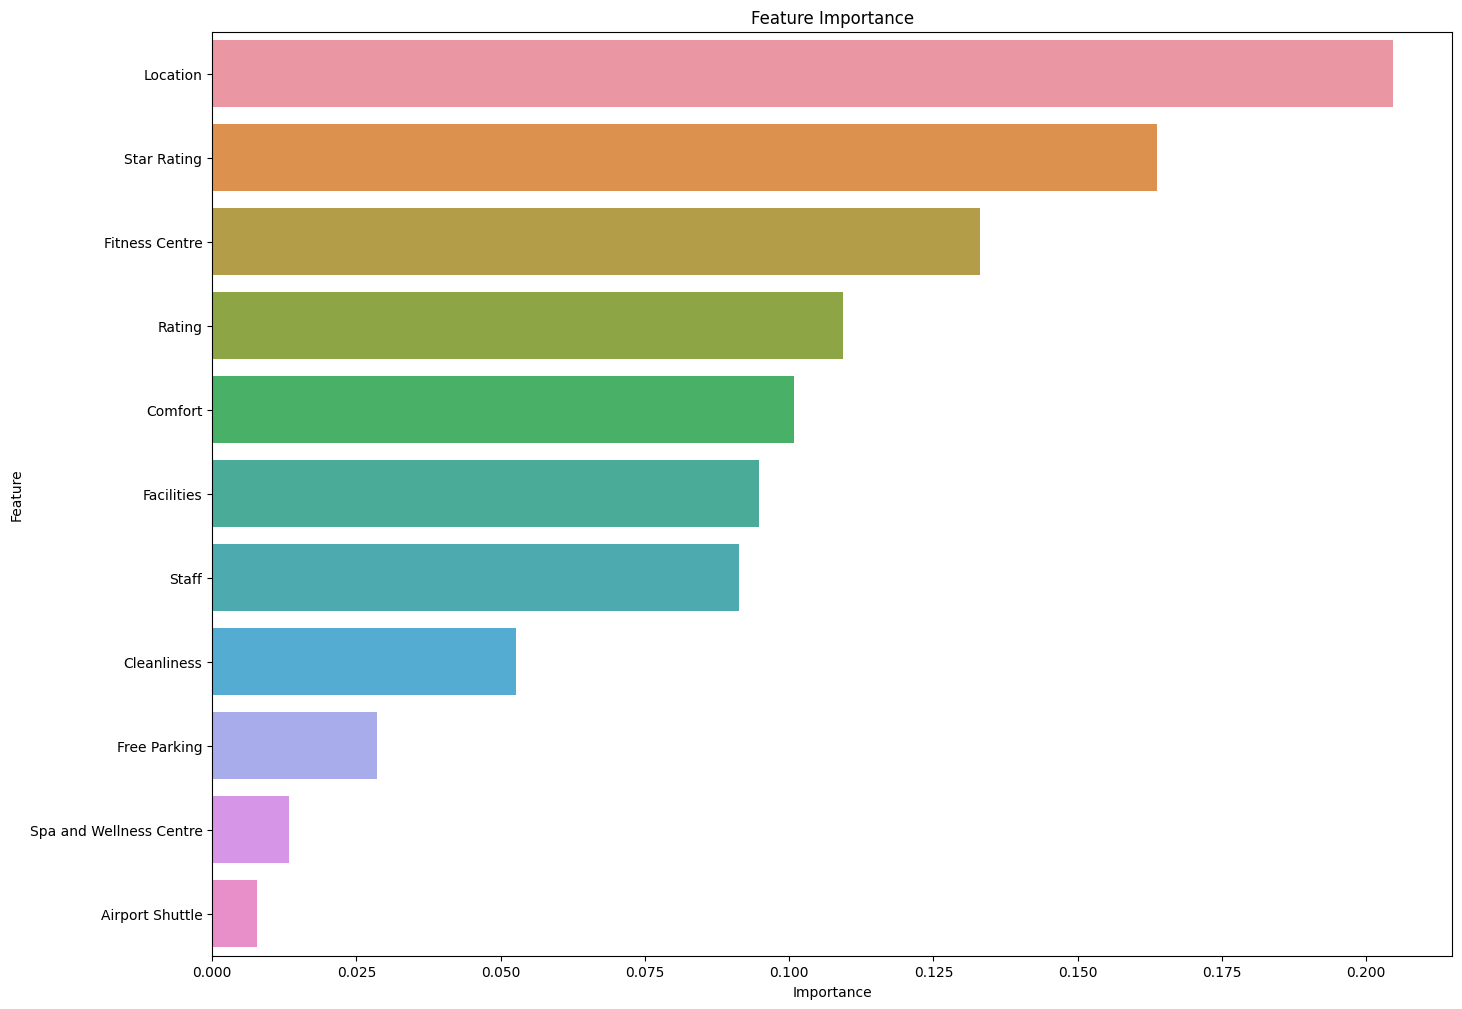

In [32]:
# Feature Importance

plt.figure(figsize = (16, 12))
sns.barplot(x = 'Importance', y = 'Feature', data = Feature_Importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

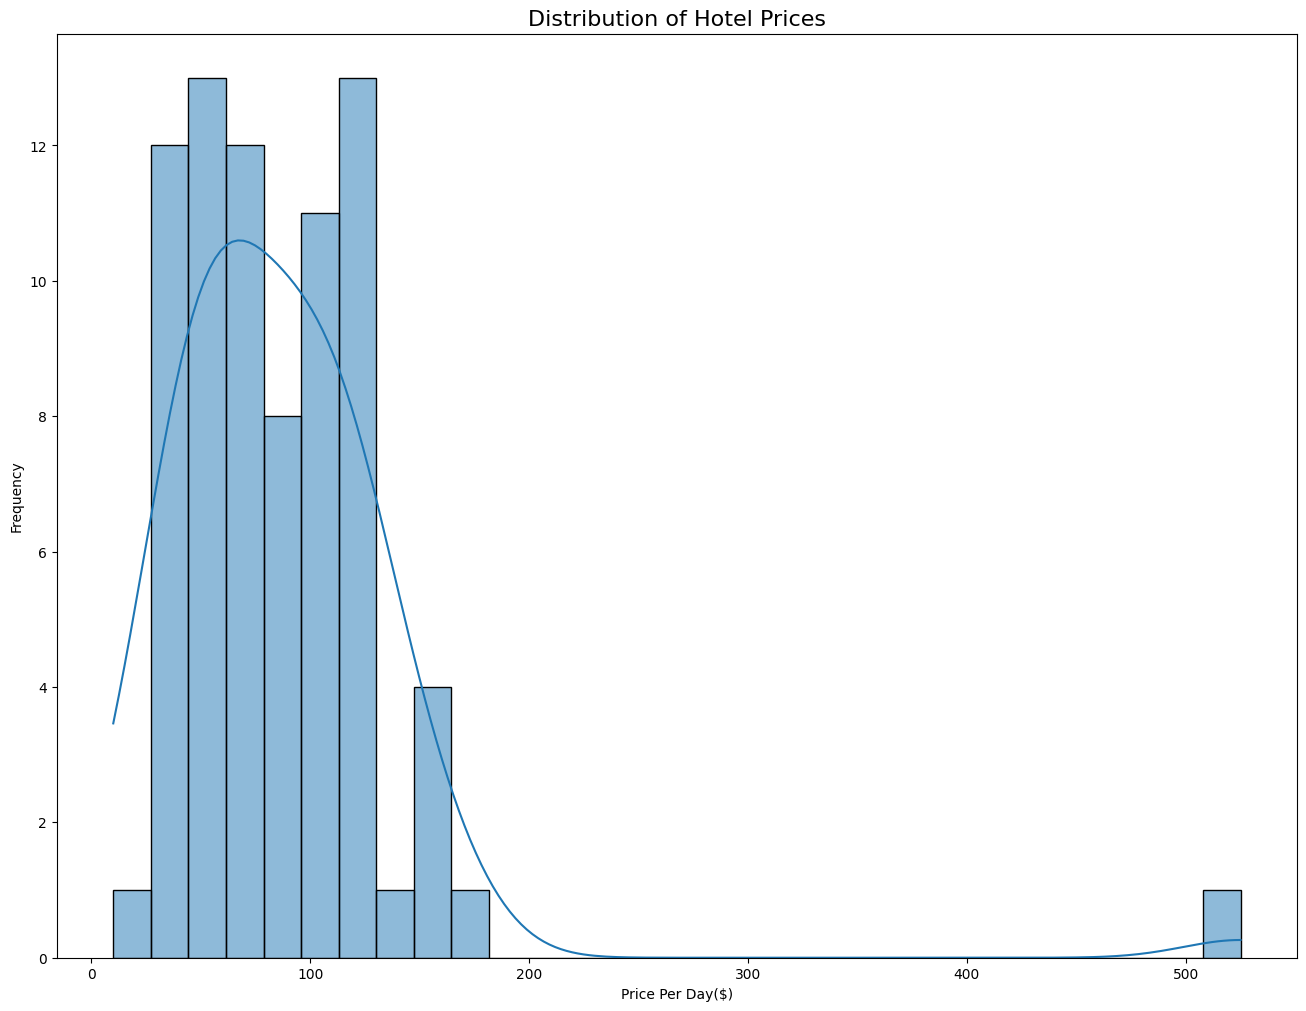

In [33]:
# Price Distribution

plt.figure(figsize = (16, 12))
sns.histplot(YH_Data['Price Per Day($)'], bins = 30, kde = True)
plt.title('Distribution of Hotel Prices', fontsize = 16)
plt.xlabel('Price Per Day($)')
plt.ylabel('Frequency')
plt.show()

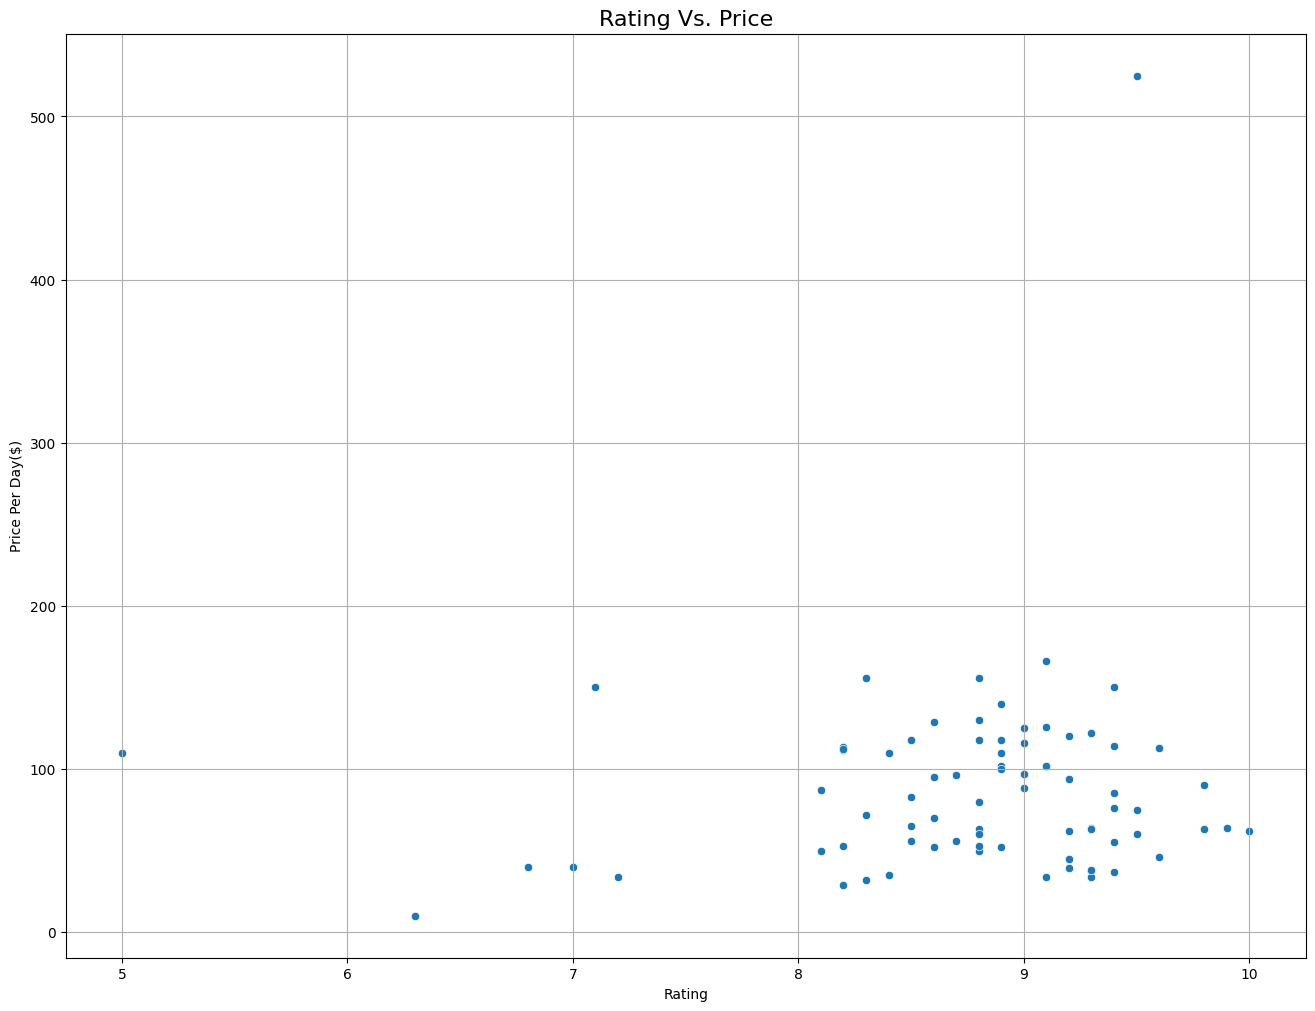

In [34]:
# Rating Vs. Price

plt.figure(figsize = (16, 12))
sns.scatterplot(data = YH_Data, x = 'Rating', y = 'Price Per Day($)')
plt.title('Rating Vs. Price', fontsize = 16)
plt.xlabel('Rating')
plt.ylabel('Price Per Day($)')
plt.grid()
plt.show()

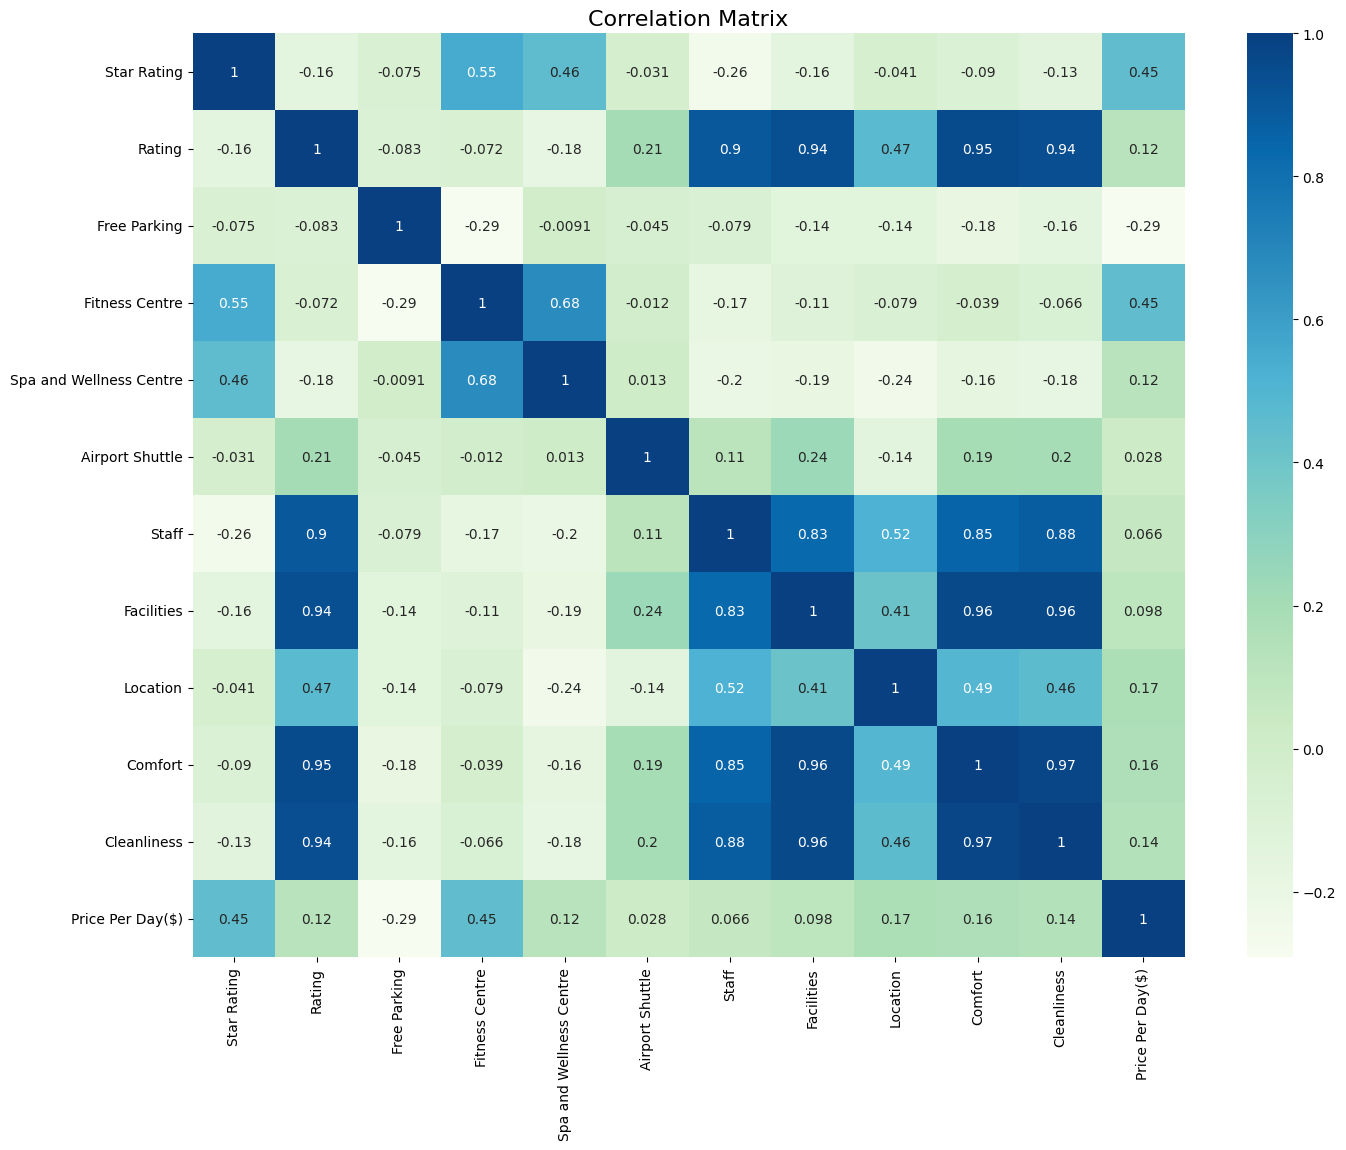

In [35]:
# Correlation Heatmap

Corr_Matrix = YH_Data.corr()

plt.figure(figsize = (16, 12))
sns.heatmap(Corr_Matrix, annot = True, cmap = 'GnBu')
plt.title('Correlation Matrix', fontsize = 16)
plt.show()

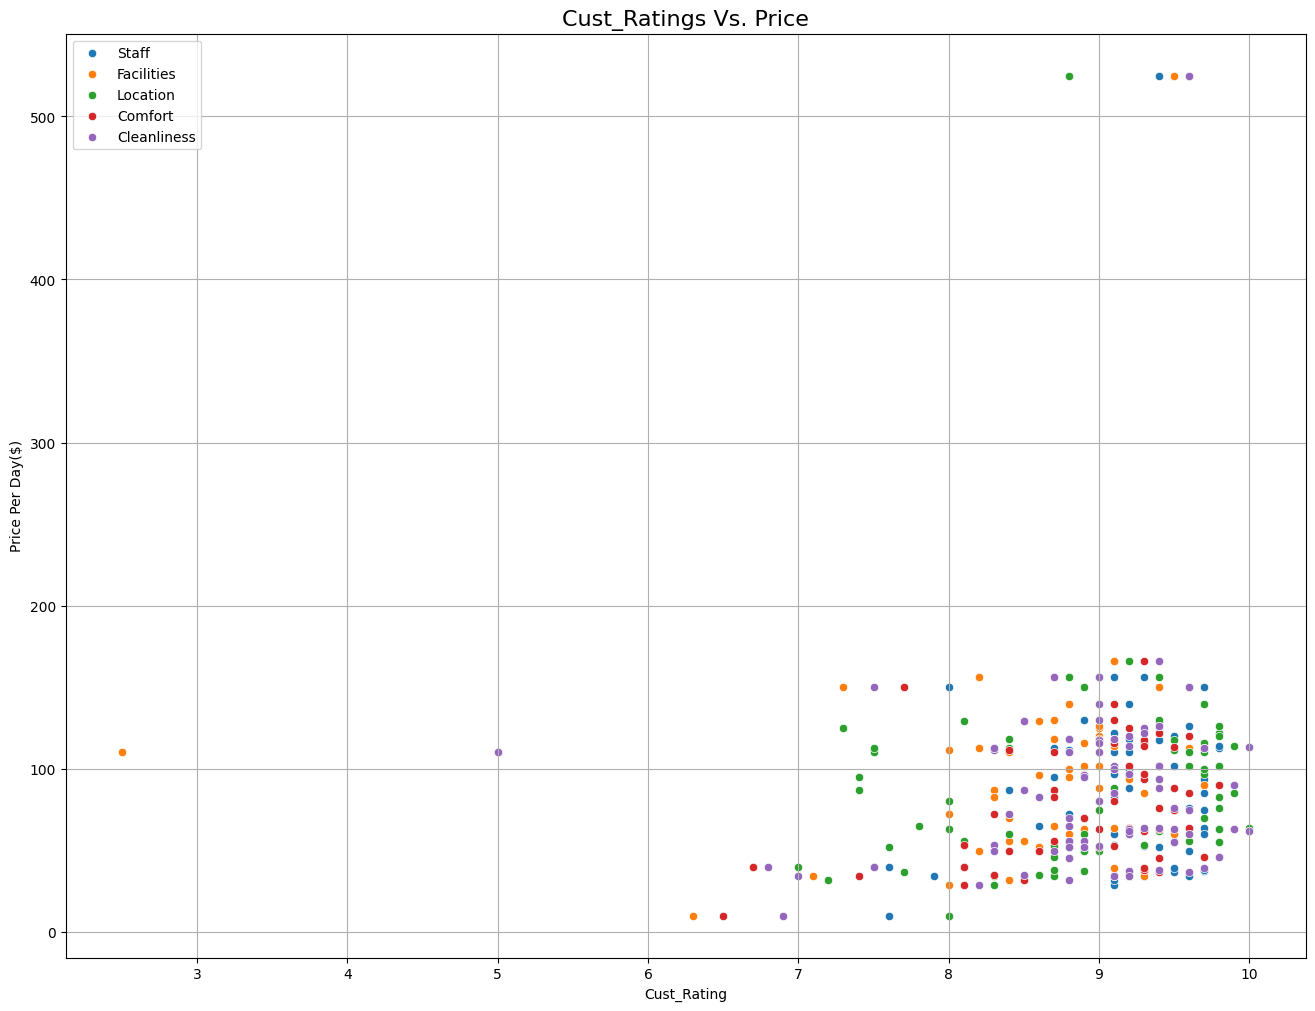

In [36]:
# Customer Ratings Vs. Price

Cust_Ratings = ['Staff', 'Facilities', 'Location', 'Comfort', 'Cleanliness']

plt.figure(figsize = (16, 12))

for Cust_Rating in Cust_Ratings:
    sns.scatterplot(data = YH_Data, x = Cust_Rating, y = 'Price Per Day($)', label = Cust_Rating)
    
plt.legend()
plt.title('Cust_Ratings Vs. Price', fontsize = 16)
plt.xlabel('Cust_Rating')
plt.ylabel('Price Per Day($)')
plt.grid()
plt.show()

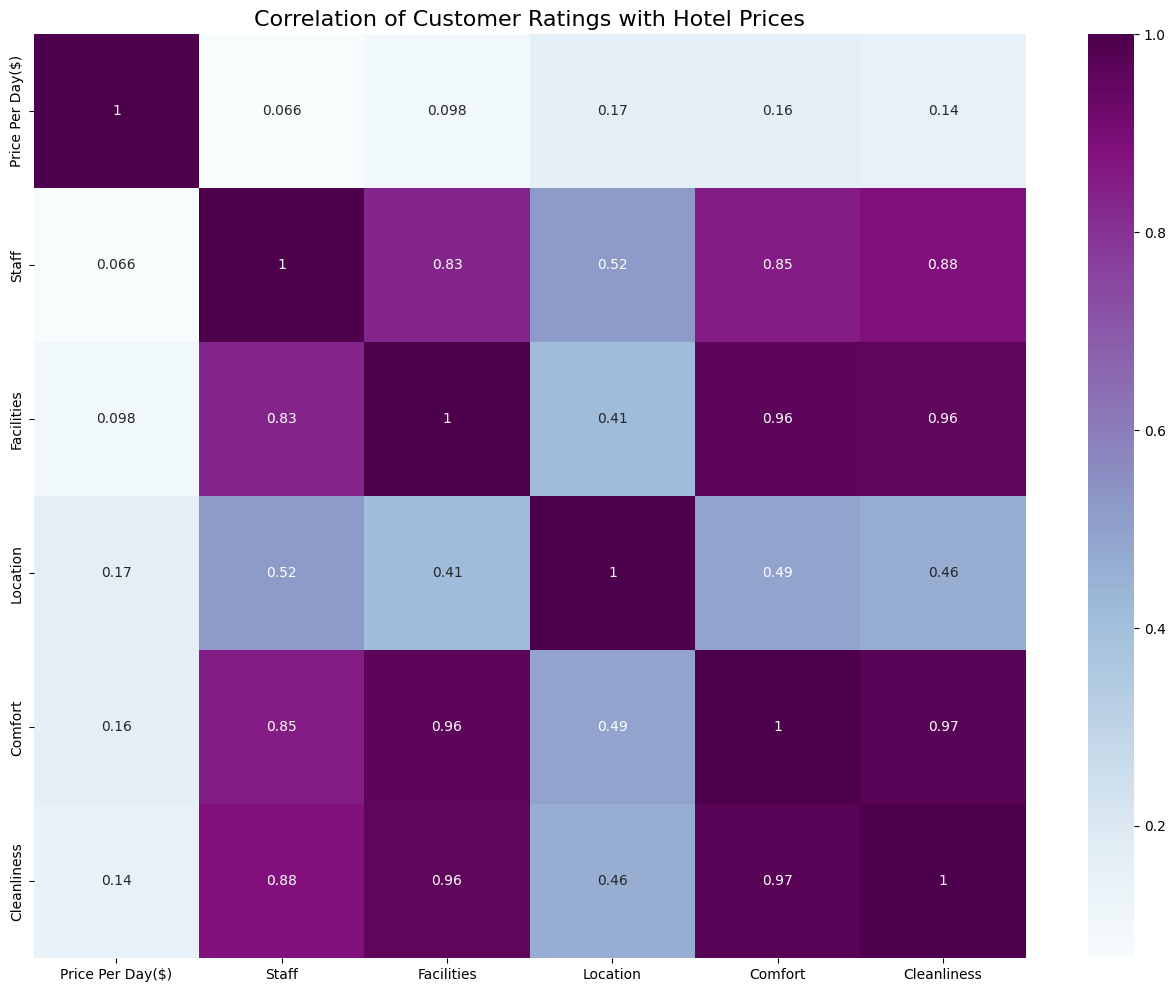

In [37]:
# Correlation among Customer Ratings

Corr_Cust = YH_Data[['Price Per Day($)'] + Cust_Ratings].corr()

plt.figure(figsize = (16, 12))
sns.heatmap(Corr_Cust, annot = True, cmap = 'BuPu')
plt.title('Correlation of Customer Ratings with Hotel Prices', fontsize = 16)
plt.show()

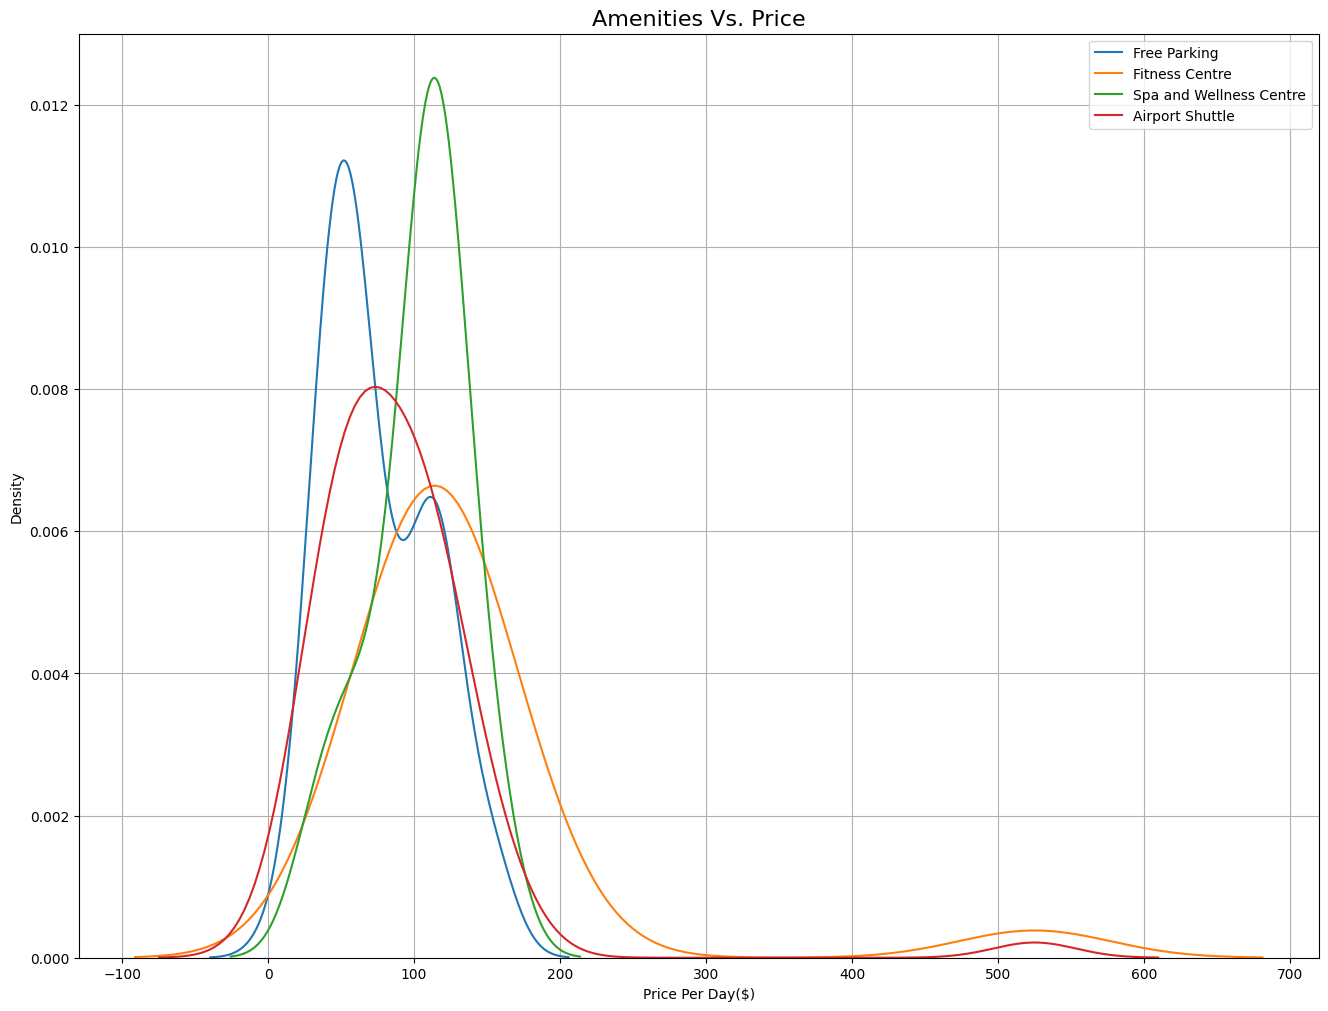

In [38]:
# Amenities Vs. Price

Amenities = ['Free Parking', 'Fitness Centre', 'Spa and Wellness Centre', 'Airport Shuttle']

plt.figure(figsize = (16, 12))

for Amenity in Amenities:
    sns.kdeplot(YH_Data[YH_Data[Amenity] == 1]['Price Per Day($)'], label = Amenity)
    
plt.legend()
plt.title('Amenities Vs. Price', fontsize = 16)
plt.xlabel('Price Per Day($)')
plt.ylabel('Density')
plt.grid()
plt.show()

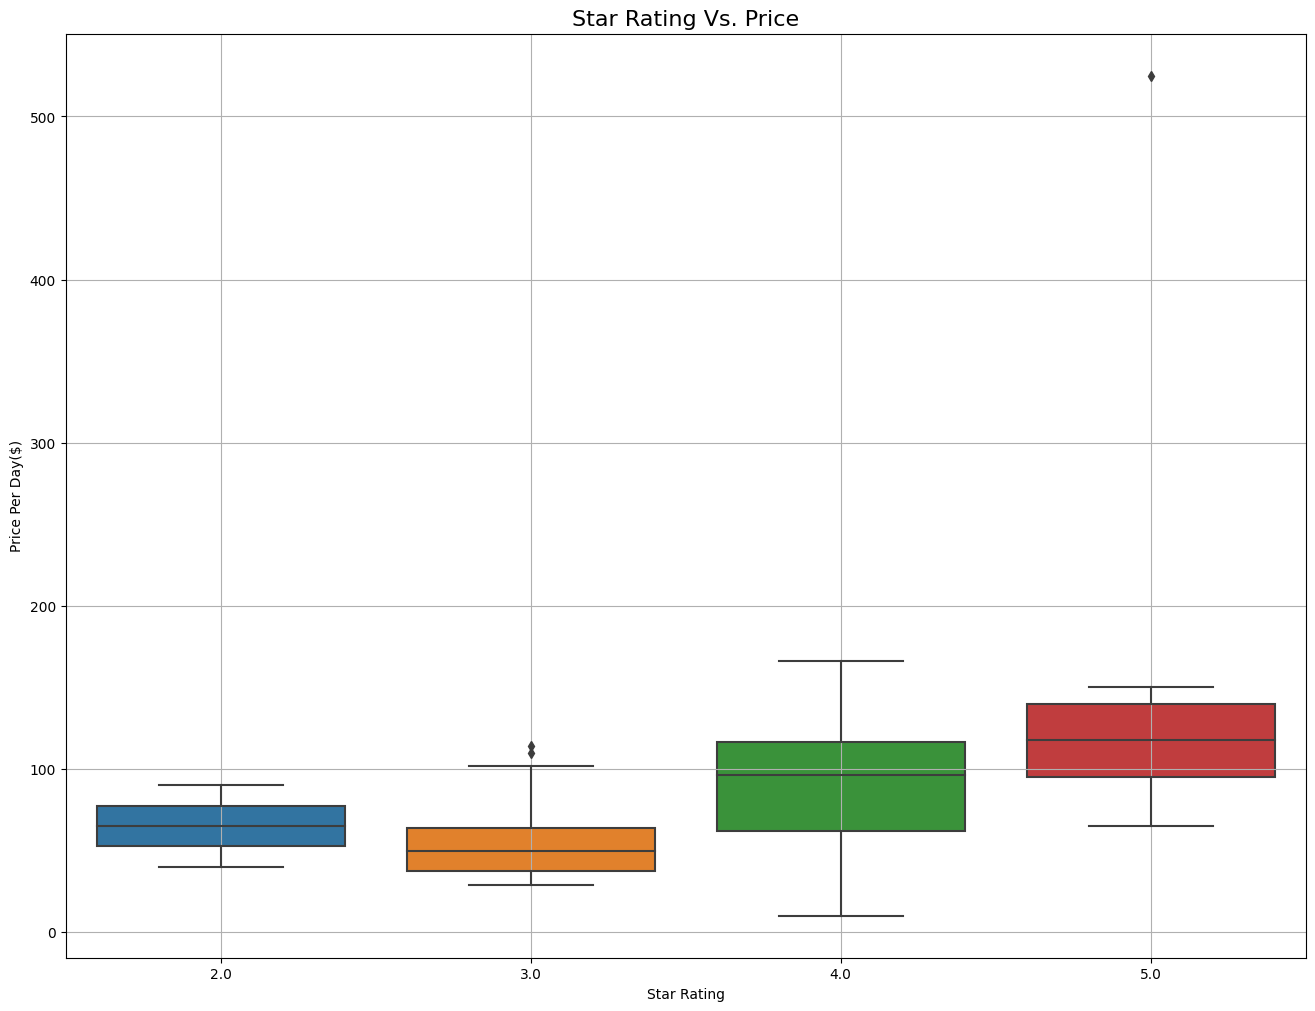

In [39]:
# Star Rating Vs. Price

plt.figure(figsize = (16, 12))
sns.boxplot(data = YH_Data, x = 'Star Rating', y = 'Price Per Day($)')
plt.title('Star Rating Vs. Price', fontsize = 16)
plt.xlabel('Star Rating')
plt.ylabel('Price Per Day($)')
plt.grid()
plt.show()

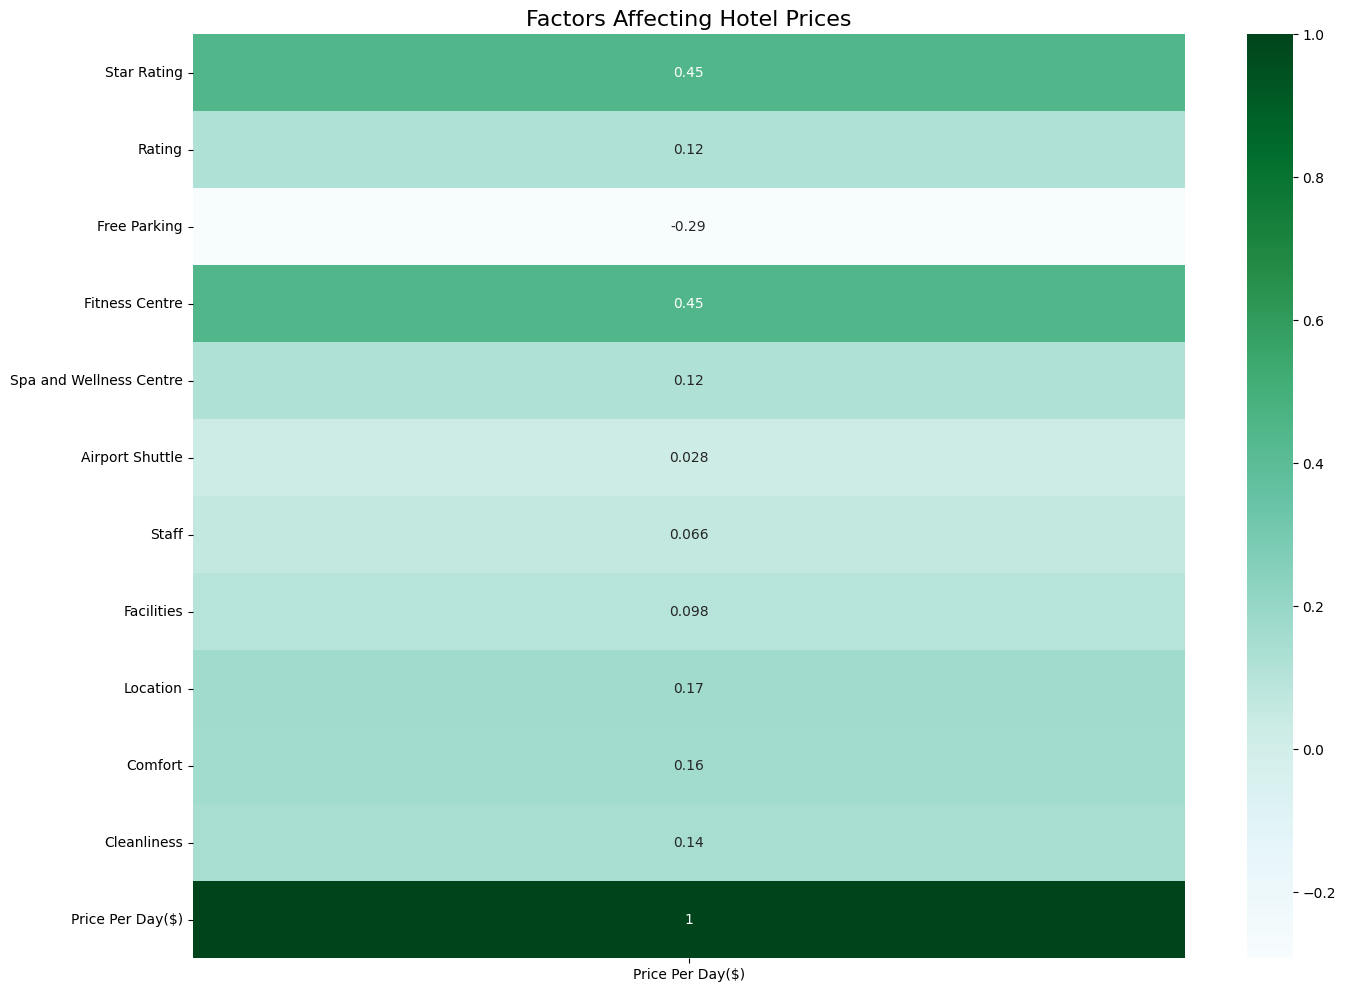

In [40]:
# Factors Affecting Hotel Prices

plt.figure(figsize = (16, 12))
sns.heatmap(Corr_Matrix[['Price Per Day($)']], annot = True, cmap = 'BuGn')
plt.title('Factors Affecting Hotel Prices', fontsize = 16)
plt.show()

### 6. Observations

### Model Observations:

1. Mean Absolute Error: 28.165624999999995
2. Mean Squared Error: 1701.803128125
3. Root Mean Squared Error: 41.25291660143559
4. R-Squared Score: -0.47330801784222687

### Answers to the Key Questions:

1. <b><u>Distribution of Hotel Prices</u></b>: The histogram shows the distribution of hotel prices in Yerevan, providing insights into the common price ranges and the spread of prices.
2. <b><u>Customer Ratings Correlation</u></b>: The heatmap shows the correlation between customer ratings and hotel prices. Higher correlation values indicate stronger relationships.
3. <b><u>Influence of Amenities on Prices</u></b>: The KDE plots show how the presence of different amenities (free parking, fitness center, spa, and airport shuttle) influences hotel prices.
4. <b><u>Effect of Star Rating on Pricing</u></b>: The box plot shows how the star rating of hotels affects their pricing, with higher star ratings typically corresponding to higher prices.
5. <b><u>Significant Factors Affecting Prices</u></b>: The heatmap highlights the most significant factors affecting hotel prices, as indicated by higher correlation coefficients with the price.